# Determining $\Sigma_{10}$, $\Sigma_{10,\text{flux selected}}$ , $\Sigma_{20}$, $\Sigma_{20,\text{flux selected}}$ for `DESIJ0132-1600`

Author(s): Fahim Rajit Hossain, S M Rafee Adnan, Sulyman Hossain, Anowar Shajib

# Calculating $\Sigma_{10}$


In the context of the paper "[The Sloan Lens ACS Survey. VIII. The Relation between Environment and Internal Structure of Early-Type Galaxies](https://arxiv.org/pdf/0806.1056.pdf)," the projected number density of galaxies inside the tenth nearest neighbor ($\Sigma_{10}$) refers to a measure of the local galaxy density surrounding a target early-type galaxy.

To explain this concept from the paper, we need to understand how the authors calculated $\Sigma_{10}$ and its significance in studying the relationship between galaxy environment and the internal structure of early-type galaxies.

1. Calculation of $\Sigma_{10}$:
In the paper, the authors studied a sample of early-type galaxies with measured gravitational lensing effects. For each target early-type galaxy, they identified its ten nearest neighbor galaxies based on their projected angular distances. The projected angular distance is the angular separation between the target galaxy and its neighbors as seen from our perspective on Earth.

$\Sigma_{10}$ is then calculated as the number of galaxies (including the target galaxy itself) within the combined area covered by the ten nearest neighbors, divided by the total area of that region. In other words, $\Sigma_{10}$ represents the number density of galaxies in the vicinity of the target galaxy, considering the influence of its ten closest neighbors.

2. Significance of $\Sigma_{10}$:
The projected number density $\Sigma_{10}$ is a crucial parameter to study the local galaxy environment around each early-type galaxy in the sample. It provides a measure of the galaxy density on small scales, capturing the immediate gravitational influences of nearby galaxies on the target galaxy.

By analyzing the correlation between $\Sigma_{10}$ and the internal properties of early-type galaxies (such as their effective radii and velocity dispersions), the authors can explore how the local galaxy environment affects the structure and evolution of early-type galaxies. High $\Sigma_{10}$ values imply dense environments with strong gravitational interactions, which might have implications for the growth and assembly history of the early-type galaxies.

In summary, $\Sigma_{10}$ quantifies the local galaxy density surrounding each target early-type galaxy in the sample. It plays a crucial role in understanding the impact of the immediate environment on the internal properties and evolution of these galaxies, providing insights into the complex interplay between galaxy environment and galaxy structure.

Finally calculations can be made by
$$\Sigma_{10} = 10/(\pi R_{10}^2)$$

## Load data

In [1]:
!pip install astropy
!pip install photutils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00


In [2]:
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.cosmology import FlatLambdaCDM
from astropy.io import fits
from astropy.stats import SigmaClip
from astropy.visualization import simple_norm
from astropy.wcs import WCS

# from google.colab import drive
from photutils.background import Background2D, MedianBackground
from photutils.segmentation import (
    SourceCatalog,
    SourceFinder,
    deblend_sources,
    detect_sources,
)

# drive.mount("/content/drive")

## Load Data

<ipython-input-3-a0391565c58f>:5: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


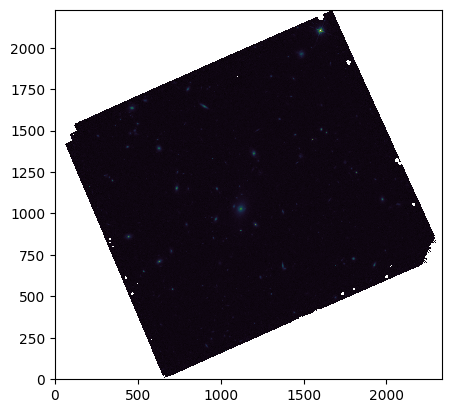

In [3]:
data, header = fits.getdata(
    "/kaggle/input/fits-file/DESIJ0132-1600_F140W_drz_sci.fits", header=True
)

plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

## Background estimation

<ipython-input-4-852a372c063c>:12: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


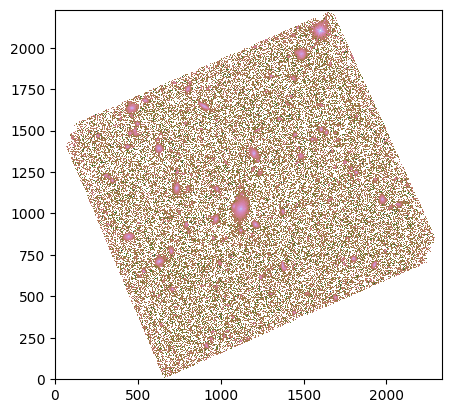

In [4]:
sigma_clip = SigmaClip(sigma=3.0)
bkg_estimator = MedianBackground()
bkg = Background2D(
    data,
    (50, 50),
    filter_size=(3, 3),
    sigma_clip=sigma_clip,
    bkg_estimator=bkg_estimator,
)

plt.imshow(
    np.log10(data - bkg.background),
    origin="lower",
    cmap="cubehelix",
    interpolation="nearest",
)

## Aperture photometry

In [5]:
np.median(bkg.background), np.median(bkg.background_rms)

bkg_subtracted_data = data - bkg.background

threshold = 5 * bkg.background_rms

segment_map = detect_sources(bkg_subtracted_data, threshold, npixels=10)

segm_deblend = deblend_sources(
    bkg_subtracted_data,
    segment_map,
    npixels=10,
    nlevels=32,
    contrast=0.001,
    progress_bar=False,
)


finder = SourceFinder(npixels=10, progress_bar=False)
segment_map = finder(bkg_subtracted_data, threshold)

print(segment_map)

cat = SourceCatalog(bkg_subtracted_data, segm_deblend)
print(cat)

<photutils.segmentation.core.SegmentationImage>
shape: (2230, 2336)
nlabels: 398
labels: [  1   2   3   4   5 ... 394 395 396 397 398]
<photutils.segmentation.catalog.SourceCatalog>
Length: 398
labels: [  1   2   3   4   5 ... 394 395 396 397 398]


In [6]:
set_x_lim1, set_x_lim2 = 950 - 600, 1250 + 600
set_y_lim1, set_y_lim2 = 900 - 600, 1100 + 600

<ipython-input-7-d0f364a4f760>:5: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/usr/local/lib/python3.10/dist-packages/photutils/segmentation/catalog.py:879: RuntimeWarning: invalid value encountered in less
  | (convdata_cutout < 0) | segmmask_cutout)
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


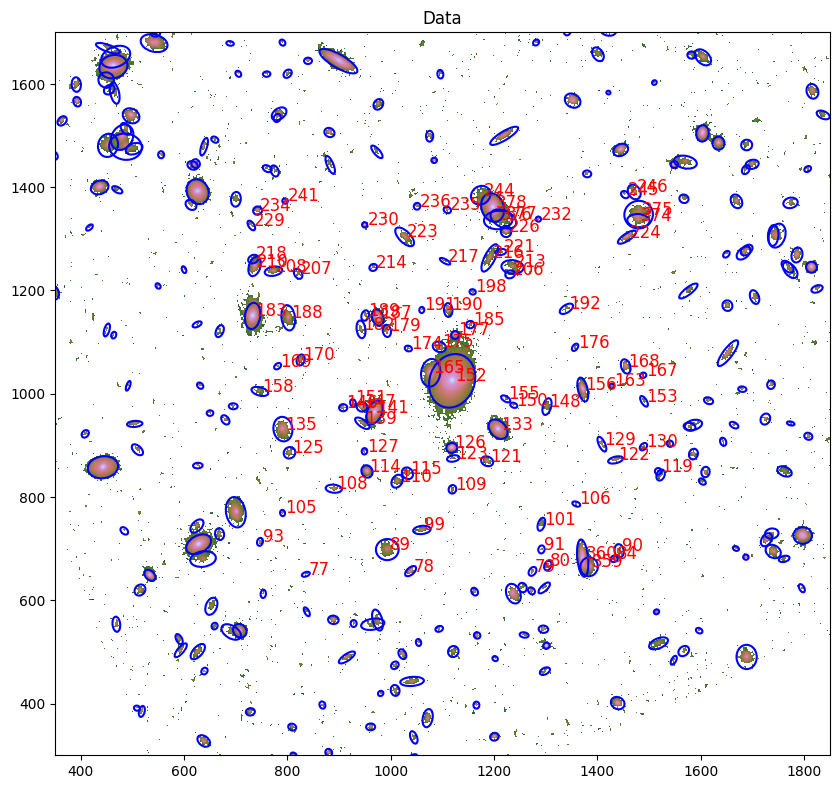

In [7]:
norm = simple_norm(data, "sqrt")

fig, ax1 = plt.subplots(1, 1, figsize=(10, 12.5))
ax1.imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
ax1.set_title("Data")

cat.plot_kron_apertures(ax=ax1, color="blue", lw=1.5)

for i in range(len(cat)):
    if (
        np.abs(cat.xcentroid[i] - cat.xcentroid[152]) < 400
        and np.abs(cat.ycentroid[i] - cat.ycentroid[152]) < 400
    ):
        ax1.text(
            cat.xcentroid[i] + 5,
            cat.ycentroid[i],
            f"{i}",
            c="r",
            fontsize=12
            # transform=ax1.transAxes
        )

# cat.plot_kron_apertures(ax=ax2, color='white', lw=1.5);

ax1.set_xlim(set_x_lim1, set_x_lim2)
ax1.set_ylim(set_y_lim1, set_y_lim2)

# hide all text outside of the axes
ax1.set_clip_on(True)
ax1.set_clip_box(ax1.bbox)

## Finding Central Lens

<ipython-input-8-c293e332f9b8>:12: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


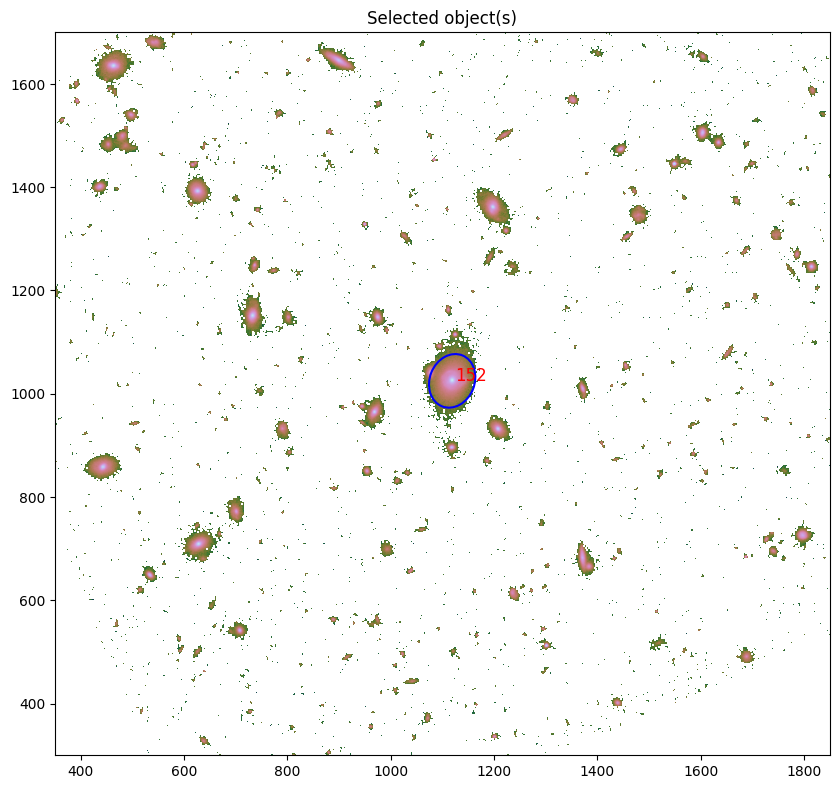

In [8]:
# Defining a function for labeling only selected objects


def label_selected_objects(selected_ids):
    # Background subtraction
    data - bkg.background

    # Plotting
    simple_norm(data, "sqrt")
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 12.5))
    ax1.imshow(
        np.log10(data - bkg.background),
        origin="lower",
        cmap="cubehelix",
        vmin=-4,
        vmax=2,
    )
    ax1.set_title("Selected object(s)")

    # Plot Kron apertures and label selected objects
    for obj_id in selected_ids:
        labels = [obj_id + 1]
        cat_subset = cat.get_labels(labels)
        cat_subset.plot_kron_apertures(ax=ax1, color="blue", lw=1.5)

        ax1.text(
            cat.xcentroid[obj_id] + 5,
            cat.ycentroid[obj_id],
            f"{obj_id}",
            c="r",
            fontsize=12
            # transform=ax1.transAxes
        )

    # Set axis limits
    ax1.set_xlim(set_x_lim1, set_x_lim2)
    ax1.set_ylim(set_y_lim1, set_y_lim2)

    # Hide text outside of the axes
    ax1.set_clip_on(True)
    ax1.set_clip_box(ax1.bbox)

    # Show the plot
    plt.show()


# Guessing the lens galaxy
id_central = 152

# Calling the function label id_central
label_selected_objects([id_central])

## Close Galaxies, Distance, Flux

In [9]:
tbl = cat.to_table()
tbl["xcentroid"].info.format = ".2f"  # optional format
tbl["ycentroid"].info.format = ".2f"
tbl["kron_flux"].info.format = ".2f"

## Creating List of neighbouring Galaxies

In [10]:
# All close galaxies

x0 = tbl["xcentroid"].value[id_central]
y0 = tbl["ycentroid"].value[id_central]
f0 = tbl["kron_flux"].value[id_central]

close_galaxies_all = []
dist_galaxies_all = []
flux_galaxies_all = []
axis_ratios_all = []

for i in range(len(tbl)):
    if i == segment_map.nlabels:
        continue
    x = tbl["xcentroid"].value[i]
    y = tbl["ycentroid"].value[i]
    f = tbl["kron_flux"].value[i]
    if np.sqrt((x - x0) ** 2 + (y - y0) ** 2) < 30 / 0.08:
        close_galaxies_all.append(i)
        flux_galaxies_all.append(f)
        dist_galaxies_all.append(np.sqrt((x - x0) ** 2 + (y - y0) ** 2))
        axis_ratios_all.append(np.sqrt(1 - tbl[i]["eccentricity"].value ** 2))

print(
    "Number of all close galaxies within 30 arcsecond radius:", len(close_galaxies_all)
)
print("Close galaxies:", (close_galaxies_all))

Number of all close galaxies within 30 arcsecond radius: 68
Close galaxies: [89, 91, 99, 101, 106, 108, 109, 110, 114, 115, 121, 122, 123, 125, 126, 127, 129, 133, 135, 139, 141, 146, 147, 148, 150, 151, 152, 153, 155, 156, 158, 163, 165, 167, 168, 169, 170, 174, 175, 176, 177, 179, 182, 185, 187, 188, 189, 190, 191, 192, 198, 206, 207, 213, 214, 216, 217, 221, 223, 226, 230, 232, 235, 236, 244, 376, 377, 378]


In [11]:
# Close galaxies excluding sources lower than 1% of the central deflector

x0 = tbl["xcentroid"].value[id_central]
y0 = tbl["ycentroid"].value[id_central]
f0 = tbl["kron_flux"].value[id_central]

close_galaxies_1 = []
dist_galaxies_1 = []
flux_galaxies_1 = []
axis_ratios_1 = []

for i in range(len(tbl)):
    if i == segment_map.nlabels:
        continue
    x = tbl["xcentroid"].value[i]
    y = tbl["ycentroid"].value[i]
    f = tbl["kron_flux"].value[i]
    if (np.sqrt((x - x0) ** 2 + (y - y0) ** 2) < 60 / 0.08) & (f > f0 * 0.01):
        close_galaxies_1.append(i)
        flux_galaxies_1.append(f)
        dist_galaxies_1.append(np.sqrt((x - x0) ** 2 + (y - y0) ** 2))
        axis_ratios_1.append(np.sqrt(1 - tbl[i]["eccentricity"].value ** 2))
print(
    "Number of close galaxies excluding dim sources within 60 arcsecond radius:",
    len(close_galaxies_1),
)

print("Close galaxies_1_percent_flux:", (close_galaxies_1))

Number of close galaxies excluding dim sources within 60 arcsecond radius: 60
Close galaxies_1_percent_flux: [21, 28, 46, 52, 67, 76, 83, 87, 88, 89, 94, 95, 103, 112, 114, 126, 133, 135, 141, 147, 152, 156, 165, 168, 172, 175, 177, 183, 187, 188, 190, 210, 211, 213, 216, 219, 223, 224, 226, 230, 240, 244, 256, 262, 267, 272, 274, 276, 283, 298, 309, 359, 360, 372, 374, 375, 376, 377, 378, 379]


## Pixels to Megaparsec unit

In [12]:
def distance_parsec(pixel_distance, z):
    """Convert distance from unit of pixels into parsec unit.

    :param pixel_distance: distance in unit of pixels

    :param z: photometric redshift

    :return: distance in parsec unit

    """

    wcs = WCS(header)

    # Get the pixel scale in degrees per pixel
    pix_scale_deg = abs(wcs.wcs.cd[0, 0])

    # Convert the pixel scale from degrees to radians
    pix_scale_radian = pix_scale_deg * np.pi / 180

    # Angles in radians
    angles_radian = pixel_distance * pix_scale_radian

    # Define cosmological parameters
    H0 = 70  # Hubble constant in km/s/Mpc
    Om0 = 0.3  # Matter density parameter
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

    # Compute the angular diameter distance
    angular_diameter_distance = cosmo.angular_diameter_distance(z)

    # Calculate the physical distance
    physical_distances_mpc = angular_diameter_distance * angles_radian

    return physical_distances_mpc

### Identify the unwanted objects

<ipython-input-8-c293e332f9b8>:12: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


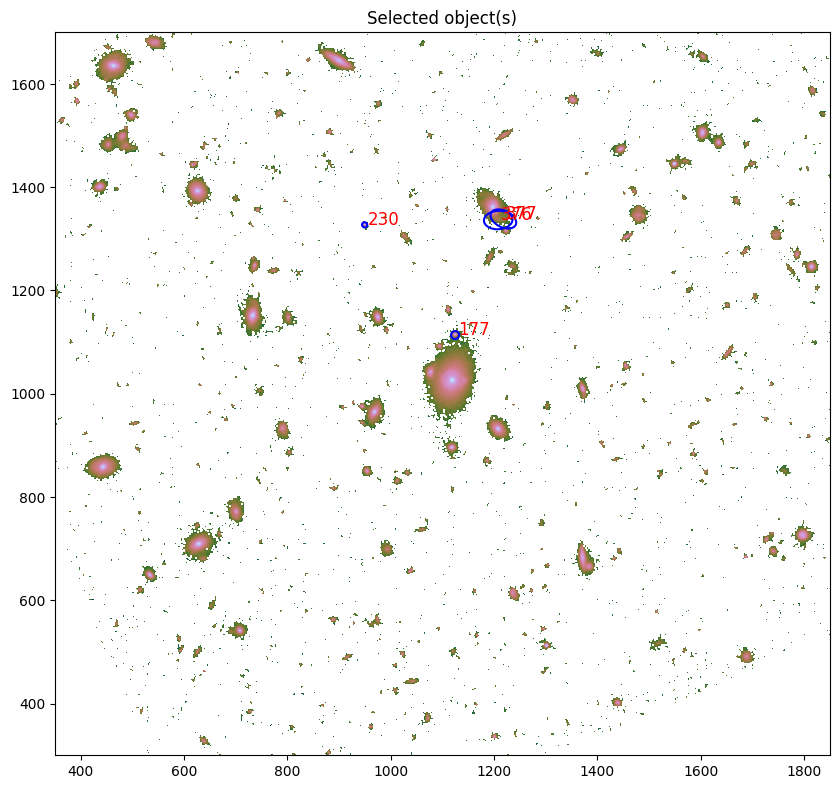

In [13]:
selected_object_ids = [376, 377, 177, 230]
label_selected_objects(selected_object_ids)

### Removing the unwanted objects from the neighboring galaxy list

In [14]:
# All close galaxies

# lens galaxy: 152
# ARC objects: None
# Possible Stars: 177
# High redshift: 165, 187, 141, 126, 133, 114, 216

remove_list = [
    152,
    177,
    165,
    175,
    187,
    141,
    126,
    133,
    114,
    216,
    188,
    213,
    188,
    135,
    168,
]

df_all = pd.DataFrame({"Distance(pixels)": dist_galaxies_all})

df_all.set_index(pd.Index(close_galaxies_all), inplace=True)

# Photometric redshift of the deflector galaxy is 0.359
df_all["Distance(megaparsec)"] = distance_parsec(df_all["Distance(pixels)"], 0.359)
df_all["Flux"] = flux_galaxies_all
df_all["Axis Ratio"] = axis_ratios_all

# Sort the DataFrame based on 'Distance'
df_all_sorted = df_all.sort_values(by="Distance(pixels)")

# Exclude unwanted sources
df_all_sys_removed = df_all_sorted.drop(remove_list)

# first 20 galaxies
df_all_20 = df_all_sys_removed.iloc[:20]

print(df_all_20.shape)
print(df_all_20)

(20, 4)
     Distance(pixels)  Distance(megaparsec)       Flux  Axis Ratio
174        105.404935              0.042343   3.255528    0.762613
155        109.293416              0.043905   3.697350    0.518161
185        114.335265              0.045930   6.876989    0.901948
150        128.326741              0.051551   3.051375    0.655615
190        137.267593              0.055142  30.807087    0.608587
191        149.234210              0.059949   2.608702    0.816459
123        150.290316              0.060374   4.954599    0.496026
179        159.121590              0.063921  15.713336    0.666031
121        169.745868              0.068189  18.747238    0.756283
198        176.717360              0.070990   4.129277    0.843678
147        181.559490              0.072935  36.836684    0.888545
148        190.169112              0.076394   9.825728    0.483622
139        192.233855              0.077223  13.537438    0.436221
151        196.645536              0.078995   5.831662

In [15]:
# Excluding galaxies lower than 1% of the central deflector

# lens galaxy: 152
# ARC objects: None
# Possible Stars: 177, 230
# possible part of spiral galaxy: 376, 377

remove_list_1 = [
    152,
    177,
    376,
    377,
    230,
    165,
    175,
    187,
    141,
    126,
    133,
    114,
    216,
    188,
    213,
    188,
    135,
    168,
    360,
    67,
    89,
    103,
    183,
    210,
    223,
    378,
    374,
    224,
    267,
    283,
    274,
    262,
    379,
    240,
    87,
    52,
    156,
]

df_1 = pd.DataFrame({"Distance(pixels)": dist_galaxies_1})
df_1.set_index(pd.Index(close_galaxies_1), inplace=True)

# Photometric redshift of the deflector galaxy is 0.359
df_1["Distance(megaparsec)"] = distance_parsec(df_1["Distance(pixels)"], 0.359)
df_1["Flux"] = flux_galaxies_1
df_1["Axis Ratios"] = axis_ratios_1

# Sort the DataFrame based on 'Distance'
df_1_sorted = df_1.sort_values(by="Distance(pixels)")

# Exclude the lensing system members
df_1_sys_removed = df_1_sorted.drop(remove_list_1)

# first 20 galaxies
df_1_20 = df_1_sys_removed.iloc[:20]
print(df_1_20.shape)
print(df_1_20)

(20, 4)
     Distance(pixels)  Distance(megaparsec)        Flux  Axis Ratios
190        137.267593              0.055142   30.807087     0.608587
147        181.559490              0.072935   36.836684     0.888545
226        307.446272              0.123506   34.752725     0.917836
244        363.515637              0.146029   29.368386     0.883834
359        446.973592              0.179556   89.689131     0.925191
375        483.434326              0.194202  120.699181     0.964977
172        536.437740              0.215495   41.235028     0.294348
46         544.134631              0.218587  135.737219     0.969064
83         592.817462              0.238143   30.165346     0.598097
256        600.160448              0.241093  228.949131     0.925735
298        656.757899              0.263829  624.451753     0.311247
276        681.269397              0.273676  240.475223     0.763593
94         681.576084              0.273799   27.945488     0.655346
372        688.862960     

## Calculating $\Sigma_{10}$, $\Sigma_{10,\text{flux selected}}$ , $\Sigma_{20}$, $\Sigma_{20,\text{flux selected}}$ and the corresponding radii

## Loading Global Mean

In [16]:
# Read flux data from each YAML file and append to corresponding lists
input_path = "/kaggle/input/global-means/DESIJ0132-1600_means.yml"

try:
    with open(input_path, "r") as f:
        data_mean = yaml.safe_load(f)
except (AttributeError, yaml.YAMLError) as e:
    print(f"Failed to load the file: {e}")

global_mean_flux_10 = data_mean.get("Global_mean_flux_10")
global_mean_flux_20 = data_mean.get("Global_mean_flux_20")
global_mean_flux_selected_10 = data_mean.get("Global_mean_flux_selected_10")
global_mean_flux_selected_20 = data_mean.get("Global_mean_flux_selected_20")
global_mean_flux_dis_10 = data_mean.get("Global_mean_flux_dis_10")
global_mean_flux_dis_20 = data_mean.get("Global_mean_flux_dis_20")
global_mean_flux_dis_selected_10 = data_mean.get("Global_mean_flux_dis_selected_10")
global_mean_flux_dis_selected_20 = data_mean.get("Global_mean_flux_dis_selected_20")

## Generating a distribution of the Physical distance using Monte Carlo random sampling to calculate uncertainty in sigma densities


In [17]:
z = 0.359  # redshift
z_uncertainty = 0.04  # redshift's uncertainty

# Define a function to estimate uncertainty in the Physical distance using
# Monte Carlo random sampling


def calculate_physical_distance_distribution(
    pixel_distance, z, z_uncertainty, num_samples=10000
):
    # Generate random samples of redshift using normal distribution
    z_samples = np.random.normal(z, z_uncertainty, num_samples)

    # Define a function to calculate physical distance
    # from redshift

    def distance_parsec(pixel_distance, z):
        """Convert distance from unit of pixels into parsec unit.

        :param pixel_distance: distance in unit of pixels

        :param z: photometric redshift

        :return: distance in parsec unit

        """

        wcs = WCS(header)

        # Get the pixel scale in degrees per pixel
        pix_scale_deg = abs(wcs.wcs.cd[0, 0])

        # Convert the pixel scale from degrees to radians
        pix_scale_radian = pix_scale_deg * np.pi / 180

        # Angles in radians
        angles_radian = pixel_distance * pix_scale_radian

        # Define cosmological parameters
        H0 = 70  # Hubble constant in km/s/Mpc
        Om0 = 0.3  # Matter density parameter
        cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

        # Compute the angular diameter distance
        angular_diameter_distance = cosmo.angular_diameter_distance(z)

        # Calculate the physical distance
        physical_distances_mpc = angular_diameter_distance * angles_radian

        return physical_distances_mpc.value

    # Calculate physical distances for each sampled redshift and pixel distance
    physical_distances = distance_parsec(pixel_distance, z_samples)

    return physical_distances

## Method A

In [18]:
# For all sources


r_10_all = df_all_20.iloc[9, df_all_20.columns.get_loc("Distance(pixels)")]
R_10_all = calculate_physical_distance_distribution(r_10_all, z, z_uncertainty)

r_20_all = df_all_20.iloc[19, df_all_20.columns.get_loc("Distance(pixels)")]
R_20_all = calculate_physical_distance_distribution(r_20_all, z, z_uncertainty)

Sigma_10_allA_distribution = []
Sigma_20_allA_distribution = []

for i in range(10000):
    Sigma_10_allA = 10 / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allA = 20 / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allA_distribution.append(Sigma_10_allA)
    Sigma_20_allA_distribution.append(Sigma_20_allA)

Sigma_10_allA_mean = np.mean(Sigma_10_allA_distribution)
Sigma_10_allA_std = np.std(Sigma_10_allA_distribution)
Sigma_20_allA_mean = np.mean(Sigma_20_allA_distribution)
Sigma_20_allA_std = np.std(Sigma_20_allA_distribution)

# Excluding dim sources

r_10_1 = df_1_20.iloc[9, df_1_20.columns.get_loc("Distance(pixels)")]
R_10_1 = calculate_physical_distance_distribution(r_10_1, z, z_uncertainty)

r_20_1 = df_1_20.iloc[19, df_1_20.columns.get_loc("Distance(pixels)")]
R_20_1 = calculate_physical_distance_distribution(r_20_1, z, z_uncertainty)

Sigma_10_1A_distribution = []
Sigma_20_1A_distribution = []

for i in range(10000):
    Sigma_10_1A = 10 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1A = 20 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1A_distribution.append(Sigma_10_1A)
    Sigma_20_1A_distribution.append(Sigma_20_1A)

Sigma_10_1A_mean = np.mean(Sigma_10_1A_distribution)
Sigma_10_1A_std = np.std(Sigma_10_1A_distribution)
Sigma_20_1A_mean = np.mean(Sigma_20_1A_distribution)
Sigma_20_1A_std = np.std(Sigma_20_1A_distribution)

print("")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10:", Sigma_10_allA_mean, "Std:", Sigma_10_allA_std)
print("Sigma 20:", Sigma_20_allA_mean, "Std:", Sigma_20_allA_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10:", Sigma_10_1A_mean, "Std:", Sigma_10_1A_std)
print("Sigma 20:", Sigma_20_1A_mean, "Std:", Sigma_20_1A_std)


FOR All SOURCES
R 10: [0.0770022  0.06941971 0.06885577 ... 0.07400479 0.08104773 0.07783334]
R 20: [0.07688036 0.09382431 0.09000985 ... 0.09342947 0.08856343 0.08966777]
Sigma 10: 646.7971015983641 Std: 99.13211742877422
Sigma 20: 852.9289061734725 Std: 131.77674802102874

EXCLUDING DIM SOURCES
R 10: [0.2452577  0.23442519 0.23740805 ... 0.24812698 0.2270925  0.25870265]
R 20: [0.27349904 0.32081714 0.29497039 ... 0.28049336 0.24836131 0.20337239]
Sigma 10: 56.00274203004572 Std: 8.737256166819172
Sigma 20: 81.55769032456074 Std: 12.58006391255494


## Method B

In [19]:
# For all sources
weighted_flux_10_all = np.sum(df_all_20["Flux"][0:10]) / global_mean_flux_10
weighted_flux_20_all = np.sum(df_all_20["Flux"][0:20]) / global_mean_flux_20

Sigma_10_allB_distribution = []
Sigma_20_allB_distribution = []

for i in range(10000):
    Sigma_10_allB = weighted_flux_10_all / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allB = weighted_flux_20_all / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allB_distribution.append(Sigma_10_allB)
    Sigma_20_allB_distribution.append(Sigma_20_allB)

Sigma_10_allB_mean = np.mean(Sigma_10_allB_distribution)
Sigma_10_allB_std = np.std(Sigma_10_allB_distribution)
Sigma_20_allB_mean = np.mean(Sigma_20_allB_distribution)
Sigma_20_allB_std = np.std(Sigma_20_allB_distribution)

# excluding dim sources
weighted_flux_10_1 = np.sum(df_1_20["Flux"][0:10]) / global_mean_flux_selected_10
weighted_flux_20_1 = np.sum(df_1_20["Flux"][0:20]) / global_mean_flux_selected_20

Sigma_10_1B_distribution = []
Sigma_20_1B_distribution = []

for i in range(10000):
    Sigma_10_1B = weighted_flux_10_1 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1B = weighted_flux_20_1 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1B_distribution.append(Sigma_10_1B)
    Sigma_20_1B_distribution.append(Sigma_20_1B)

Sigma_10_1B_mean = np.mean(Sigma_10_1B_distribution)
Sigma_10_1B_std = np.std(Sigma_10_1B_distribution)
Sigma_20_1B_mean = np.mean(Sigma_20_1B_distribution)
Sigma_20_1B_std = np.std(Sigma_20_1B_distribution)


print("")
print("Considering Light Flux")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10_updated:", Sigma_10_allB_mean, "Std:", Sigma_10_allB_std)
print("Sigma 20_updated:", Sigma_20_allB_mean, "Std:", Sigma_20_allB_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10_updated:", Sigma_10_1B_mean, "Std:", Sigma_10_1B_std)
print("Sigma 20_updated:", Sigma_20_1B_mean, "Std:", Sigma_20_1B_std)


Considering Light Flux
FOR All SOURCES
R 10: [0.0770022  0.06941971 0.06885577 ... 0.07400479 0.08104773 0.07783334]
R 20: [0.07688036 0.09382431 0.09000985 ... 0.09342947 0.08856343 0.08966777]
Sigma 10_updated: 50.14366714318867 Std: 7.685328037593233
Sigma 20_updated: 99.38793721424213 Std: 15.355346810050879

EXCLUDING DIM SOURCES
R 10: [0.2452577  0.23442519 0.23740805 ... 0.24812698 0.2270925  0.25870265]
R 20: [0.27349904 0.32081714 0.29497039 ... 0.28049336 0.24836131 0.20337239]
Sigma 10_updated: 21.469292231489813 Std: 3.3495271686195007
Sigma 20_updated: 64.78233422580684 Std: 9.992508391568832


## Method C

In [20]:
flux_c_10_all = []
flux_c_20_all = []
flux_c_10_1 = []
flux_c_20_1 = []

# for all sources
for i in range(20):
    flux_all = (
        df_all_20["Flux"][i : i + 1] / df_all_20["Distance(megaparsec)"][i : i + 1]
    )

    if i < 10:
        flux_c_10_all.append(flux_all)
        flux_c_20_all.append(flux_all)

    elif 9 < i < 20:
        flux_c_20_all.append(flux_all)

weighted_flux_10_all = np.sum(flux_c_10_all) / global_mean_flux_dis_10
weighted_flux_20_all = np.sum(flux_c_20_all) / global_mean_flux_dis_20

Sigma_10_allC_distribution = []
Sigma_20_allC_distribution = []

for i in range(10000):
    Sigma_10_allC = weighted_flux_10_all / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allC = weighted_flux_20_all / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allC_distribution.append(Sigma_10_allC)
    Sigma_20_allC_distribution.append(Sigma_20_allC)

Sigma_10_allC_mean = np.mean(Sigma_10_allC_distribution)
Sigma_10_allC_std = np.std(Sigma_10_allC_distribution)
Sigma_20_allC_mean = np.mean(Sigma_20_allC_distribution)
Sigma_20_allC_std = np.std(Sigma_20_allC_distribution)


# excluding dim sources
for i in range(20):
    flux_1 = df_1_20["Flux"][i : i + 1] / df_1_20["Distance(megaparsec)"][i : i + 1]

    if i < 10:
        flux_c_10_1.append(flux_1)
        flux_c_20_1.append(flux_1)

    elif 9 < i < 20:
        flux_c_20_1.append(flux_1)

weighted_flux_10_1 = np.sum(flux_c_10_1) / global_mean_flux_dis_selected_10
weighted_flux_20_1 = np.sum(flux_c_20_1) / global_mean_flux_dis_selected_20

Sigma_10_1C_distribution = []
Sigma_20_1C_distribution = []

for i in range(10000):
    Sigma_10_1C = weighted_flux_10_1 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1C = weighted_flux_20_1 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1C_distribution.append(Sigma_10_1C)
    Sigma_20_1C_distribution.append(Sigma_20_1C)

Sigma_10_1C_mean = np.mean(Sigma_10_1C_distribution)
Sigma_10_1C_std = np.std(Sigma_10_1C_distribution)
Sigma_20_1C_mean = np.mean(Sigma_20_1C_distribution)
Sigma_20_1C_std = np.std(Sigma_20_1C_distribution)

print("")
print("Considering Light Flux And Distance")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10_updated:", Sigma_10_allC_mean, "Std:", Sigma_10_allC_std)
print("Sigma 20_updated:", Sigma_20_allC_mean, "Std:", Sigma_20_allC_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10_updated:", Sigma_10_1C_mean, "Std:", Sigma_10_1C_std)
print("Sigma 20_updated:", Sigma_20_1C_mean, "Std:", Sigma_20_1C_std)


Considering Light Flux And Distance
FOR All SOURCES
R 10: [0.0770022  0.06941971 0.06885577 ... 0.07400479 0.08104773 0.07783334]
R 20: [0.07688036 0.09382431 0.09000985 ... 0.09342947 0.08856343 0.08966777]
Sigma 10_updated: 20.40983665011213 Std: 3.12813758518879
Sigma 20_updated: 43.199870833341095 Std: 6.674341146304596

EXCLUDING DIM SOURCES
R 10: [0.2452577  0.23442519 0.23740805 ... 0.24812698 0.2270925  0.25870265]
R 20: [0.27349904 0.32081714 0.29497039 ... 0.28049336 0.24836131 0.20337239]
Sigma 10_updated: 4.144413122267307 Std: 0.6465897525329934
Sigma 20_updated: 12.773434204986753 Std: 1.9702693644471374


## Method D

In [21]:
# Initialize flux variables
flux_d_10_all = []
flux_d_20_all = []
flux_d_10_1 = []
flux_d_20_1 = []

# Define a short radius
pixel_distance = 125  # for 10 arcseconds

# Mean Photometric redshift of all the deflectors is 0.581
s = distance_parsec(pixel_distance, 0.581).value

# Process both dataframes
for i in range(20):
    distance_all = df_all_20["Distance(megaparsec)"].iloc[i]
    flux_all = df_all_20["Flux"].iloc[i]
    distance_1 = df_1_20["Distance(megaparsec)"].iloc[i]
    flux_1 = df_1_20["Flux"].iloc[i]

    # Processing for df_all_20
    if i < 10:
        if distance_all <= s:
            flux_contrib_all = flux_all / s
        else:
            flux_contrib_all = flux_all / distance_all

        flux_d_10_all.append(flux_contrib_all)
        flux_d_20_all.append(flux_contrib_all)

    elif 9 < i < 20:
        if distance_all <= s:
            flux_contrib_all = flux_all / s
        else:
            flux_contrib_all = flux_all / distance_all

        flux_d_20_all.append(flux_contrib_all)

    # Processing for df_1_20
    if i < 10:
        if distance_1 <= s:
            flux_contrib_1 = flux_1 / s
        else:
            flux_contrib_1 = flux_1 / distance_1

        flux_d_10_1.append(flux_contrib_1)
        flux_d_20_1.append(flux_contrib_1)

    elif 9 < i < 20:
        if distance_1 <= s:
            flux_contrib_1 = flux_1 / s
        else:
            flux_contrib_1 = flux_1 / distance_1

        flux_d_20_1.append(flux_contrib_1)

weighted_flux_10_all = np.sum(flux_d_10_all) / global_mean_flux_dis_10
weighted_flux_20_all = np.sum(flux_d_20_all) / global_mean_flux_dis_20

Sigma_10_allD_distribution = []
Sigma_20_allD_distribution = []

for i in range(10000):
    Sigma_10_allD = weighted_flux_10_all / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allD = weighted_flux_20_all / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allD_distribution.append(Sigma_10_allD)
    Sigma_20_allD_distribution.append(Sigma_20_allD)

Sigma_10_allD_mean = np.mean(Sigma_10_allD_distribution)
Sigma_10_allD_std = np.std(Sigma_10_allD_distribution)
Sigma_20_allD_mean = np.mean(Sigma_20_allD_distribution)
Sigma_20_allD_std = np.std(Sigma_20_allD_distribution)

# Excluding dim sources
weighted_flux_10_1 = np.sum(flux_d_10_1) / global_mean_flux_dis_selected_10
weighted_flux_20_1 = np.sum(flux_d_20_1) / global_mean_flux_dis_selected_20


Sigma_10_1D_distribution = []
Sigma_20_1D_distribution = []

for i in range(10000):
    Sigma_10_1D = weighted_flux_10_1 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1D = weighted_flux_20_1 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1D_distribution.append(Sigma_10_1D)
    Sigma_20_1D_distribution.append(Sigma_20_1D)

Sigma_10_1D_mean = np.mean(Sigma_10_1D_distribution)
Sigma_10_1D_std = np.std(Sigma_10_1D_distribution)
Sigma_20_1D_mean = np.mean(Sigma_20_1D_distribution)
Sigma_20_1D_std = np.std(Sigma_20_1D_distribution)

# Print results
print("")
print("Considering Light Flux And Distance")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10_updated:", Sigma_10_allD_mean, "Std:", Sigma_10_allD_std)
print("Sigma 20_updated:", Sigma_20_allD_mean, "Std:", Sigma_20_allD_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10_updated:", Sigma_10_1D_mean, "Std:", Sigma_10_1D_std)
print("Sigma 20_updated:", Sigma_20_1D_mean, "Std:", Sigma_20_1D_std)


Considering Light Flux And Distance
FOR All SOURCES
R 10: [0.0770022  0.06941971 0.06885577 ... 0.07400479 0.08104773 0.07783334]
R 20: [0.07688036 0.09382431 0.09000985 ... 0.09342947 0.08856343 0.08966777]
Sigma 10_updated: 17.629902809056855 Std: 2.7020677600539833
Sigma 20_updated: 40.106240963015296 Std: 6.196378116863856

EXCLUDING DIM SOURCES
R 10: [0.2452577  0.23442519 0.23740805 ... 0.24812698 0.2270925  0.25870265]
R 20: [0.27349904 0.32081714 0.29497039 ... 0.28049336 0.24836131 0.20337239]
Sigma 10_updated: 4.061763140035968 Std: 0.6336951327204344
Sigma 20_updated: 12.67394411401463 Std: 1.9549232738686217


# Visualization

<ipython-input-22-4999617d7fbe>:17: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
<ipython-input-22-4999617d7fbe>:20: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
<ipython-input-22-4999617d7fbe>:23: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
<ipython-input-22-4999617d7fbe>:26: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


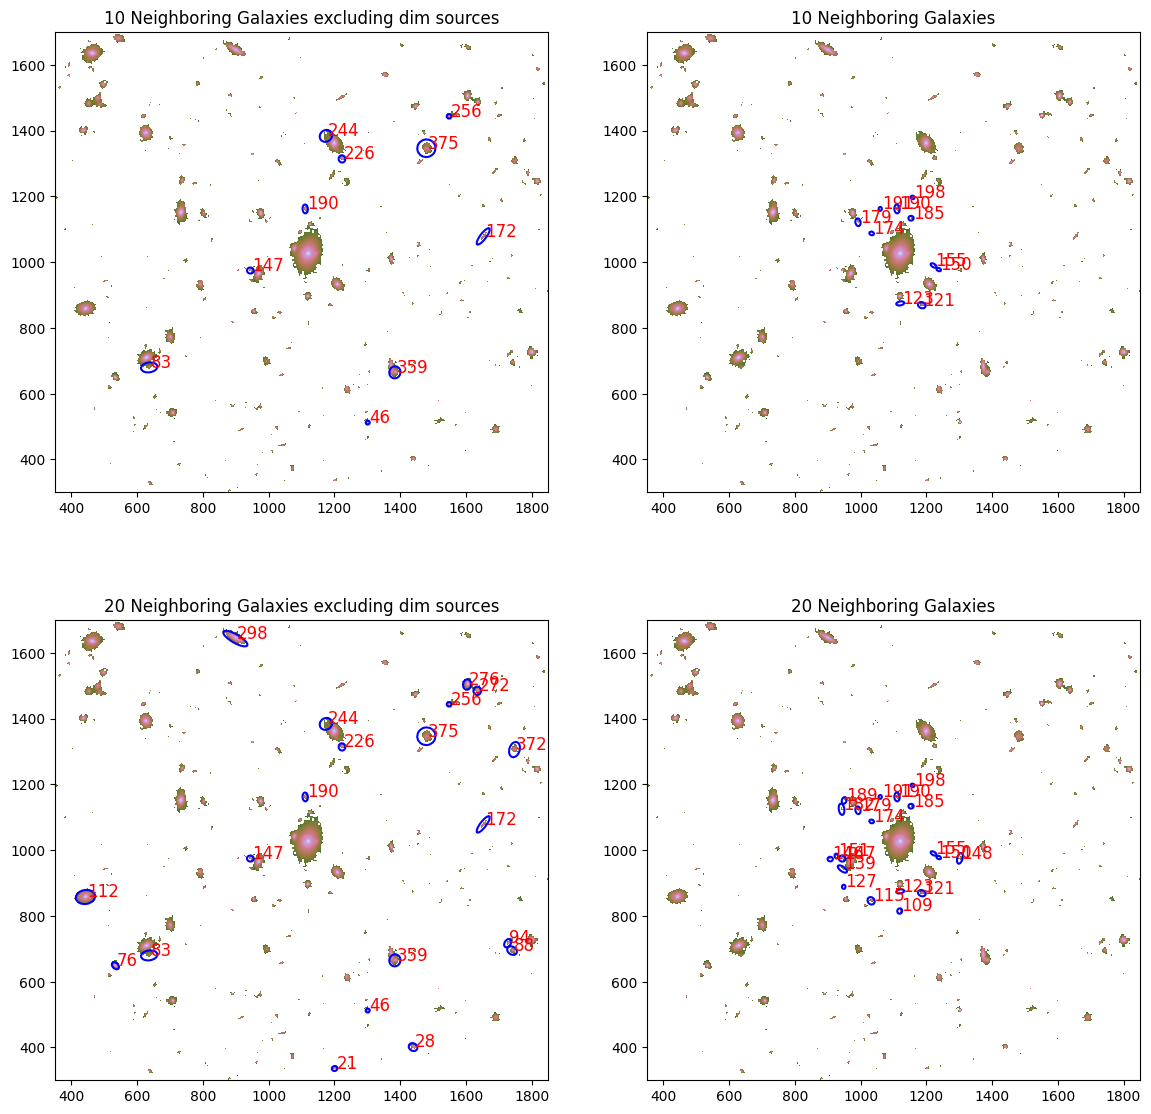

In [22]:
close_ids_all = list(df_all_20.index.values)
close_ids_all_10 = close_ids_all[:10]

updated_close_ids_all = [s + 1 for s in close_ids_all]
updated_close_ids_all_10 = updated_close_ids_all[:10]

close_ids_1 = list(df_1_20.index.values)
close_ids_1_10 = close_ids_1[:10]

updated_close_ids_1 = [s + 1 for s in close_ids_1]
updated_close_ids_1_10 = updated_close_ids_1[:10]

norm = simple_norm(data, "sqrt")
fig, axs = plt.subplots(2, 2, figsize=(14, 14))  # , figsize=(10, 12.5)

axs[0, 0].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
axs[0, 1].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
axs[1, 0].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
axs[1, 1].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)

cat_subset_1_10 = cat.get_labels(updated_close_ids_1_10)
cat_subset_1_10.plot_kron_apertures(ax=axs[0, 0], color="blue", lw=1.5)

cat_subset_all_10 = cat.get_labels(updated_close_ids_all_10)
cat_subset_all_10.plot_kron_apertures(ax=axs[0, 1], color="blue", lw=1.5)

cat_subset_all = cat.get_labels(updated_close_ids_1)
cat_subset_all.plot_kron_apertures(ax=axs[1, 0], color="blue", lw=1.5)

cat_subset_1 = cat.get_labels(updated_close_ids_all)
cat_subset_1.plot_kron_apertures(ax=axs[1, 1], color="blue", lw=1.5)

axs[0, 0].set_title("10 Neighboring Galaxies excluding dim sources")
axs[0, 1].set_title("10 Neighboring Galaxies")
axs[1, 0].set_title("20 Neighboring Galaxies excluding dim sources")
axs[1, 1].set_title("20 Neighboring Galaxies")

for i in close_ids_1_10:
    axs[0, 0].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

for i in close_ids_all_10:
    axs[0, 1].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

for i in close_ids_1:
    axs[1, 0].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

for i in close_ids_all:
    axs[1, 1].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

axs[0, 0].set_xlim(set_x_lim1, set_x_lim2)
axs[0, 0].set_ylim(set_y_lim1, set_y_lim2)

axs[0, 1].set_xlim(set_x_lim1, set_x_lim2)
axs[0, 1].set_ylim(set_y_lim1, set_y_lim2)

axs[1, 0].set_xlim(set_x_lim1, set_x_lim2)
axs[1, 0].set_ylim(set_y_lim1, set_y_lim2)

axs[1, 1].set_xlim(set_x_lim1, set_x_lim2)
axs[1, 1].set_ylim(set_y_lim1, set_y_lim2)

# hide all text outside of the axes
axs[0, 0].set_clip_on(True)
axs[0, 0].set_clip_box(axs[0, 0].bbox)

axs[0, 1].set_clip_on(True)
axs[0, 1].set_clip_box(axs[0, 0].bbox)

axs[1, 0].set_clip_on(True)
axs[1, 0].set_clip_box(axs[0, 0].bbox)

axs[1, 1].set_clip_on(True)
axs[1, 1].set_clip_box(axs[0, 0].bbox)

### Store the $\Sigma_{10}$, $\Sigma_{10}$ flux selected, $\Sigma_{20}$, $\Sigma_{20}$ flux selected values in the YAML file

In [23]:
# convert the numpy.float64 values to floats

Sigma_10_1A_mean = Sigma_10_1A_mean.item()
Sigma_20_1A_mean = Sigma_20_1A_mean.item()
Sigma_10_allA_mean = Sigma_10_allA_mean.item()
Sigma_20_allA_mean = Sigma_20_allA_mean.item()
Sigma_10_1A_std = Sigma_10_1A_std.item()
Sigma_20_1A_std = Sigma_20_1A_std.item()
Sigma_10_allA_std = Sigma_10_allA_std.item()
Sigma_20_allA_std = Sigma_20_allA_std.item()

Sigma_10_1B_mean = Sigma_10_1B_mean.item()
Sigma_20_1B_mean = Sigma_20_1B_mean.item()
Sigma_10_allB_mean = Sigma_10_allB_mean.item()
Sigma_20_allB_mean = Sigma_20_allB_mean.item()
Sigma_10_1B_std = Sigma_10_1B_std.item()
Sigma_20_1B_std = Sigma_20_1B_std.item()
Sigma_10_allB_std = Sigma_10_allB_std.item()
Sigma_20_allB_std = Sigma_20_allB_std.item()

Sigma_10_1C_mean = Sigma_10_1C_mean.item()
Sigma_20_1C_mean = Sigma_20_1C_mean.item()
Sigma_10_allC_mean = Sigma_10_allC_mean.item()
Sigma_20_allC_mean = Sigma_20_allC_mean.item()
Sigma_10_1C_std = Sigma_10_1C_std.item()
Sigma_20_1C_std = Sigma_20_1C_std.item()
Sigma_10_allC_std = Sigma_10_allC_std.item()
Sigma_20_allC_std = Sigma_20_allC_std.item()

Sigma_10_1D_mean = Sigma_10_1D_mean.item()
Sigma_20_1D_mean = Sigma_20_1D_mean.item()
Sigma_10_allD_mean = Sigma_10_allD_mean.item()
Sigma_20_allD_mean = Sigma_20_allD_mean.item()
Sigma_10_1D_std = Sigma_10_1D_std.item()
Sigma_20_1D_std = Sigma_20_1D_std.item()
Sigma_10_allD_std = Sigma_10_allD_std.item()
Sigma_20_allD_std = Sigma_20_allD_std.item()

In [24]:
src_path = r"/kaggle/input/point-estimates/DESIJ0132-1600_point_estimates.yml"
dst_path = r"/kaggle/working/"
shutil.copy(src_path, dst_path)

# Existing YAML file with other parameters
existing_yaml_file = "DESIJ0132-1600_point_estimates.yml"


# Variables to include in the YAML file
environment_variables = {
    "Sigma_10a_flux_selected": [Sigma_10_1A_mean, Sigma_10_1A_std],
    "Sigma_20a_flux_selected": [Sigma_20_1A_mean, Sigma_20_1A_std],
    "Sigma_10a": [Sigma_10_allA_mean, Sigma_10_allA_std],
    "Sigma_20a": [Sigma_20_allA_mean, Sigma_20_allA_std],
    "Sigma_10b_flux_selected": [Sigma_10_1B_mean, Sigma_10_1B_std],
    "Sigma_20b_flux_selected": [Sigma_20_1B_mean, Sigma_20_1B_std],
    "Sigma_10b": [Sigma_10_allB_mean, Sigma_10_allB_std],
    "Sigma_20b": [Sigma_20_allB_mean, Sigma_20_allB_std],
    "Sigma_10c_flux_selected": [Sigma_10_1C_mean, Sigma_10_1C_std],
    "Sigma_20c_flux_selected": [Sigma_20_1C_mean, Sigma_20_1C_std],
    "Sigma_10c": [Sigma_10_allC_mean, Sigma_10_allC_std],
    "Sigma_20c": [Sigma_20_allC_mean, Sigma_20_allC_std],
    "Sigma_10d_flux_selected": [Sigma_10_1D_mean, Sigma_10_1D_std],
    "Sigma_20d_flux_selected": [Sigma_20_1D_mean, Sigma_20_1D_std],
    "Sigma_10d": [Sigma_10_allD_mean, Sigma_10_allD_std],
    "Sigma_20d": [Sigma_20_allD_mean, Sigma_20_allD_std],
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# Write the updated content back to the YAML file
with open(existing_yaml_file, "w") as file:
    yaml.dump(existing_content, file, default_flow_style=False)

In [25]:
# Read the YAML file using safe_load

with open(existing_yaml_file, "r") as file:
    try:
        yaml_read = yaml.safe_load(file)
        print("YAML Data:")
        print("Number of params:", len(list(yaml_read.keys())))
        print(yaml_read)
    except yaml.YAMLError as e:
        print(f"Error reading YAML file: {e}")

YAML Data:
Number of params: 32
{'R_eff_light': 1.0737275050961488, 'Sigma_10a': [646.7971015983641, 99.13211742877422], 'Sigma_10a_flux_selected': [56.00274203004572, 8.737256166819172], 'Sigma_10b': [50.14366714318867, 7.685328037593233], 'Sigma_10b_flux_selected': [21.469292231489813, 3.3495271686195007], 'Sigma_10c': [20.40983665011213, 3.12813758518879], 'Sigma_10c_flux_selected': [4.144413122267307, 0.6465897525329934], 'Sigma_10d': [17.629902809056855, 2.7020677600539833], 'Sigma_10d_flux_selected': [4.061763140035968, 0.6336951327204344], 'Sigma_20a': [852.9289061734725, 131.77674802102874], 'Sigma_20a_flux_selected': [81.55769032456074, 12.58006391255494], 'Sigma_20b': [99.38793721424213, 15.355346810050879], 'Sigma_20b_flux_selected': [64.78233422580684, 9.992508391568832], 'Sigma_20c': [43.199870833341095, 6.674341146304596], 'Sigma_20c_flux_selected': [12.773434204986753, 1.9702693644471374], 'Sigma_20d': [40.106240963015296, 6.196378116863856], 'Sigma_20d_flux_selected': [

## Determining the mean for normalizing

In [26]:
# Mean of Fluxes
flux_10_mean = np.mean(df_all_20["Flux"][0:10])
flux_20_mean = np.mean(df_all_20["Flux"][0:20])
flux_10_1_mean = np.mean(df_1_20["Flux"][0:10])
flux_20_1_mean = np.mean(df_1_20["Flux"][0:20])

# Mean of Flux/Distance
flux_d_10_mean = np.mean(flux_d_10_all)
flux_d_20_mean = np.mean(flux_d_20_all)
flux_d_10_1_mean = np.mean(flux_d_10_1)
flux_d_20_1_mean = np.mean(flux_d_20_1)

print(flux_10_mean, flux_20_mean, flux_10_1_mean, flux_20_1_mean)
print(flux_d_10_mean, flux_d_20_mean, flux_d_10_1_mean, flux_d_20_1_mean)

9.384148221290214 10.446606182398188 77.8239919065711 136.1294606459851
141.07490259545705 144.19423991070212 446.503245052544 578.7016946113371


9.384148221290214 10.446606182398188 77.8239919065711 136.1294606459851
141.07490259545705 144.19423991070212 446.503245052544 578.7016946113371
add Codeadd Markdown

In [27]:
mean_variables = {
    "Flux_10b_mean": flux_10_mean,
    "Flux_20b_mean": flux_20_mean,
    "Flux_selected_10b_mean": flux_10_1_mean,
    "Flux_selected_20b_mean": flux_20_1_mean,
    "Flux_dis_10_mean": flux_d_10_mean,
    "Flux_dis_20_mean": flux_d_20_mean,
    "Flux_dis_10_1_mean": flux_d_10_1_mean,
    "Flux_dis_20_1_mean": flux_d_20_1_mean,
}

# make all the numpy variales to float
mean_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in mean_variables.items()
}

In [28]:
# Write the dictionary to a YAML file
yaml_file_name = "DESIJ0132-1600_means.yml"
with open(yaml_file_name, "w") as yaml_file:
    yaml.dump(mean_variables, yaml_file, default_flow_style=False)
print(f"YAML file '{yaml_file_name}' created successfully.")

YAML file 'DESIJ0132-1600_means.yml' created successfully.
